In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pandas import DataFrame
import itertools
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
import sklearn

In [ ]:
# Loadin Dataset
df=pd.read_csv('/content/Gold_data.csv')

In [ ]:
df.set_index('date',inplace=True)
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [ ]:
# Creating train and test data
train=df.loc[:'2020-10-10']
test=df.loc['2020-10-10':]

In [ ]:
train.tail()

,price
date,
2020-10-06,4221.5
2020-10-07,4341.1
2020-10-08,4869.1
2020-10-09,4586.4
2020-10-10,4519.3


In [ ]:
test.head()

,price
date,
2020-10-10,4519.3
2020-10-11,4473.6
2020-10-12,4343.3
2020-10-13,4460.7
2020-10-14,4473.4


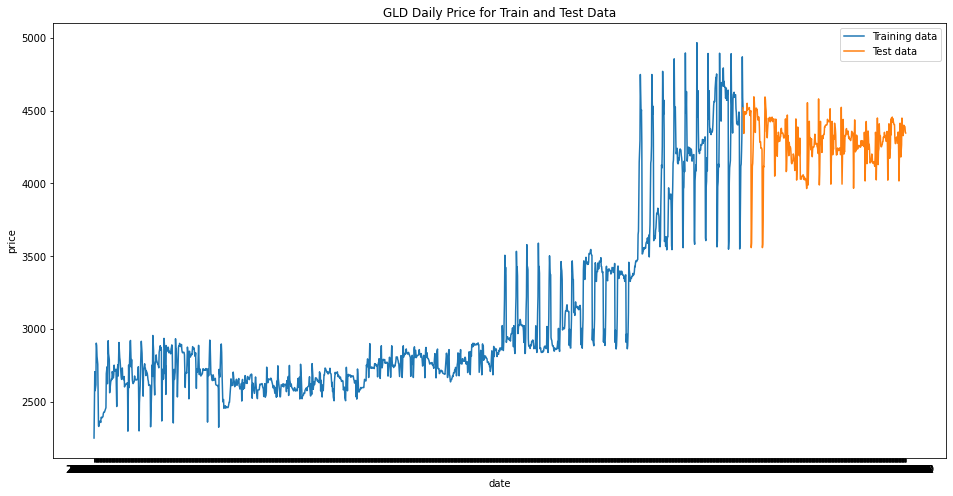

In [ ]:
# Plot the test and train data
plt.figure(figsize=(16,8))
sns.lineplot(x=train.index, y='price', data=train, linewidth=1.5, label='Training data').set_title('GLD Daily Price for Train and Test Data')
sns.lineplot(x=test.index, y='price', data=test, linewidth=1.5, label='Test data')
plt.show()

In [ ]:
#Modelling
y_hat_avg=test.copy()
fit1=ExponentialSmoothing(np.asarray(train['price']),seasonal_periods=30,trend='add',seasonal='add').fit()
y_hat_avg['Holt_Winter']=fit1.forecast(len(test))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
fit1

In [ ]:
y_hat_avg['Holt_Winter']

date
2020-10-10    4611.812727
2020-10-11    4708.094809
2020-10-12    4781.743782
2020-10-13    4829.979583
2020-10-14    4878.090756
                 ...     
2021-12-17     805.151168
2021-12-18     757.761946
2021-12-19     719.411243
2021-12-20     742.900696
2021-12-21     748.162928
Name: Holt_Winter, Length: 438, dtype: float64

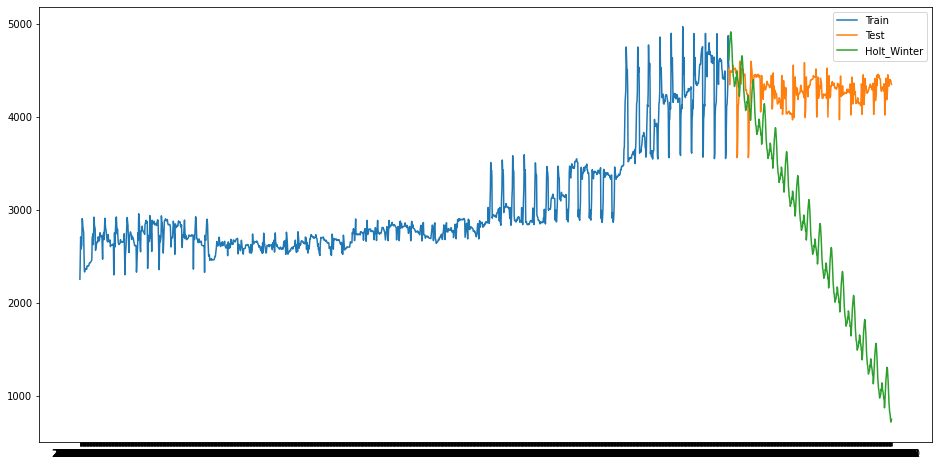

In [ ]:
# Plotting model with results
plt.figure(figsize=(16,8))
plt.plot(train['price'],label='Train')
plt.plot(test['price'],label='Test')
plt.plot(y_hat_avg['Holt_Winter'],label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
1-sklearn.metrics.mean_absolute_percentage_error(test.price,y_hat_avg.Holt_Winter)

0.6366127314663926